In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train

,id,value
0,11/1/04,0.5992
1,10/1/12,0.9259
2,1/1/07,5.9182
3,2/1/06,9.2365
4,6/1/07,22.7446
...,...,...
105,9/1/06,3.2992
106,4/1/06,22.0183
107,7/1/05,22.2829
108,6/1/08,23.1280


In [6]:
ids=[x.split('/') for x in train['id']]
date=[]
month=[]
year=[]
for x in ids:
    date.append(int(x[1]))
    month.append(int(x[0]))
    year.append(int(x[2]))
train['date']=date
train['month']=month
train['year']=year

In [7]:
ids=[x.split('/') for x in test['id']]
date=[]
month=[]
year=[]
for x in ids:
    date.append(int(x[1]))
    month.append(int(x[0]))
    year.append(int(x[2]))
test['date']=date
test['month']=month
test['year']=year

In [8]:
train

,id,value,date,month,year
0,11/1/04,0.5992,1,11,4
1,10/1/12,0.9259,1,10,12
2,1/1/07,5.9182,1,1,7
3,2/1/06,9.2365,1,2,6
4,6/1/07,22.7446,1,6,7
...,...,...,...,...,...
105,9/1/06,3.2992,1,9,6
106,4/1/06,22.0183,1,4,6
107,7/1/05,22.2829,1,7,5
108,6/1/08,23.1280,1,6,8


In [9]:
value=list(train['value'])
month=list(train['month'])
year=list(train['year'])

In [10]:
test

,id,date,month,year
0,5/1/10,1,5,10
1,4/1/09,1,4,9
2,9/1/13,1,9,13
3,1/1/06,1,1,6
4,2/1/07,1,2,7
5,8/1/12,1,8,12
6,6/1/14,1,6,14
7,3/1/08,1,3,8
8,12/1/04,1,12,4
9,7/1/11,1,7,11


In [11]:
train.dtypes

id        object
value    float64
date       int64
month      int64
year       int64
dtype: object

In [152]:
norm=120#normalize

In [153]:
train['xfunc']=(12*train['year']+train['month'])/norm
#xfunc=12yr+mo

In [154]:
train.head()

,id,value,date,month,year,xfunc
0,11/1/04,0.5992,1,11,4,0.491667
1,10/1/12,0.9259,1,10,12,1.283333
2,1/1/07,5.9182,1,1,7,0.708333
3,2/1/06,9.2365,1,2,6,0.616667
4,6/1/07,22.7446,1,6,7,0.750000


In [155]:
xfunc=list(train['xfunc'])

In [156]:
xmin=min(xfunc)
xmax=max(xfunc)
print(xmin,xmax)

0.49166666666666664 1.4833333333333334


/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


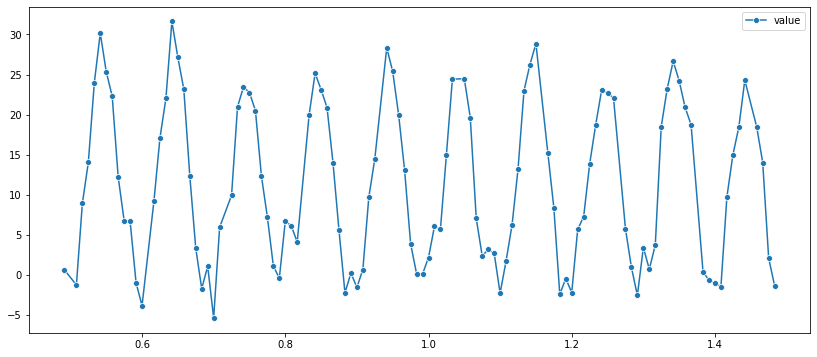

In [157]:
plt.figure(figsize=(14,6))
sns.lineplot(xfunc,value,marker='o',label='value')
plt.show()


In [158]:
train_part=train[:100]
valid_part=train[100:]

In [159]:
xdata=train_part.xfunc.values
tdata=train_part.value.values
xvalid=valid_part.xfunc.values
tvalid=valid_part.value.values

In [160]:
#TRYING POLYNOMIAL AND FAILING MISERABLY

In [161]:
#import numpy as np
#xdata=np.genfromtxt('gaussian.csv',usecols=(0),delimiter=',')
#tdata=np.genfromtxt('gaussian.csv',usecols=(1),delimiter=',')

def square_error(m,t_i,w,x_i):
    phi=make_phi(m,x_i)
    w_t=w[:,None].transpose()
    wphi=np.matmul(w_t,phi[:,None])
    f=np.sum(wphi)
    diff=t_i-f
    return diff**2

def sum_square_error(m,n,t,w,x):
    total=0
    for i in range(n):
        total+=square_error(m,t[i],w,x[i])
    return total/2

def rms_error(sse,n):
    return (sse*2/n)**0.5

def make_phi(m,x_i):
    phi=np.zeros(m)
    for i in range(m):
        phi[i]=x_i**i
    return phi

def des_mat(m,n,x):
    des= np.empty((0,m))
    
    for i in range(n):
        phi=make_phi(m,x[i])
        des=np.append(des,[phi],axis=0)
    return des

def reg_sum_square_error(lamb,m,n,t,w,x):
    sse=sum_square_error(m,n,t,w,x)
    w_t=w[:,None].transpose()
    rege=np.sum((lamb/2)*np.matmul(w_t,w[:,None]))
    return rege+sse

m=3
n=4
lamb=0

def least_square_regression_pinv(x,t,m,n):
    x=xdata[:n]
    t=tdata[:n]
    des=des_mat(m,n,x)
    moopeninv=np.linalg.pinv(des)
    wml=np.matmul(moopeninv,t)
    res=sum_square_error(m,n,t,wml,x)
    rmsres=rms_error(res,n)
    return wml,rmsres

def reg_least_square_regression_pinv(xdata,tdata,m,n,lamb):
    x=xdata[:n]
    t=tdata[:n]
    des=des_mat(m,n,x)
    #pinv
    '''
    pinv=np.matmul(des.transpose(),des)
    a=np.identity(m)
    a=a*lamb
    pinv=np.add(pinv,a)
    pinv=np.linalg.inv(pinv)
    pinv=np.matmul(pinv,des.transpose())
    '''
    pinv = np.matmul(np.linalg.pinv(lamb*np.identity(m)+np.matmul(np.transpose(des),des)),np.transpose(des))
    #print('reg',pinv)
    wmlreg=np.matmul(pinv,t)
    res=sum_square_error(m,n,t,wmlreg,x)
    resreg=reg_sum_square_error(lamb,m,n,t,wmlreg,x)
    rmsres=rms_error(res,n)
    rmsresreg=rms_error(resreg,n)
    return wmlreg,rmsresreg,rmsres


In [162]:
#testing

In [163]:
errmin=1e43
for i in range(100):
    wml,rmsres=least_square_regression_pinv(xdata,tdata,i,100)
    err=sum_square_error(i,10,tvalid,wml,xvalid)
    testerr=rms_error(err,10)
    print(i,testerr,rmsres)
    if errmin>testerr:
        mmin=i
        errmin=testerr
print(mmin,errmin)

0 18.486708243113483 14.669039274383309
1 10.838234243452943 10.031069306497887
2 10.792542356864125 10.020408333233156
3 10.820938122769212 10.020217403938517
4 10.899442456816015 10.014087232646506
5 10.817338024074136 9.982541691644803
6 11.013921055208069 9.964804843494786
7 10.995146481641038 9.895044683603487
8 10.999070802474634 9.89504229082436
9 10.640473374159328 9.85494643225084
10 10.713636510323642 9.847352026039959
11 11.637324427771237 9.674920766318783
12 11.570678609621648 9.672690541540005
13 11.109358245556686 9.638526766779044
14 11.237858916404646 9.546816931288529
15 11.237229605021197 9.54569574645344
16 10.971450660319478 9.506298025086393
17 11.102744537676104 9.535049134607096
18 11.210000463905862 9.549002028192433
19 11.280966531409039 9.549455053054817
20 10.104517065801472 9.106588956901055
21 10.07899110291108 9.137076261589804
22 10.09545465115345 9.162543549431758
23 10.149430901989996 9.182131475394712
24 10.088247482915992 9.171379727382165
25 10.1551

In [164]:
errmin

9.322142540706999

In [165]:
test['xfunc']=(12*test['year']+test['month'])/norm


In [166]:
test

,id,date,month,year,xfunc
0,5/1/10,1,5,10,1.041667
1,4/1/09,1,4,9,0.933333
2,9/1/13,1,9,13,1.375000
3,1/1/06,1,1,6,0.608333
4,2/1/07,1,2,7,0.716667
5,8/1/12,1,8,12,1.266667
6,6/1/14,1,6,14,1.450000
7,3/1/08,1,3,8,0.825000
8,12/1/04,1,12,4,0.500000
9,7/1/11,1,7,11,1.158333


In [167]:
xfunctest=list(test.xfunc)

In [168]:
wml,rmsres=least_square_regression_pinv(xdata,tdata,80,100)

In [169]:
xtest=test['xfunc'].values

In [170]:
xtest

array([1.04166667, 0.93333333, 1.375     , 0.60833333, 0.71666667,
       1.26666667, 1.45      , 0.825     , 0.5       , 1.15833333])

In [171]:
def get_output(m,n,x_test,wml):
    pred=[]
    for i in range(n):
        phi=make_phi(m,x_test[i])
        res=np.matmul(wml.transpose(),phi)
        ans=np.sum(res)
        pred.append(ans)
    return pred

In [172]:
pred=get_output(80,10,xtest,wml)

In [173]:
pred

[11.825420774284254,
 9.403526323589752,
 12.0673828125,
 11.340213081379439,
 10.87844023258812,
 10.872064471244812,
 19.375,
 10.806037773293596,
 12.66787431032908,
 8.023485562880524]

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


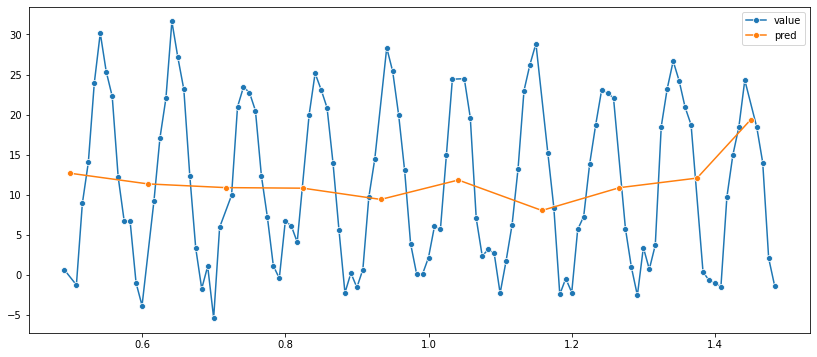

In [174]:
plt.figure(figsize=(14,6))
sns.lineplot(xfunc,value,marker='o',label='value')
sns.lineplot(xfunctest,pred,marker='o',label='pred')
plt.show()

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


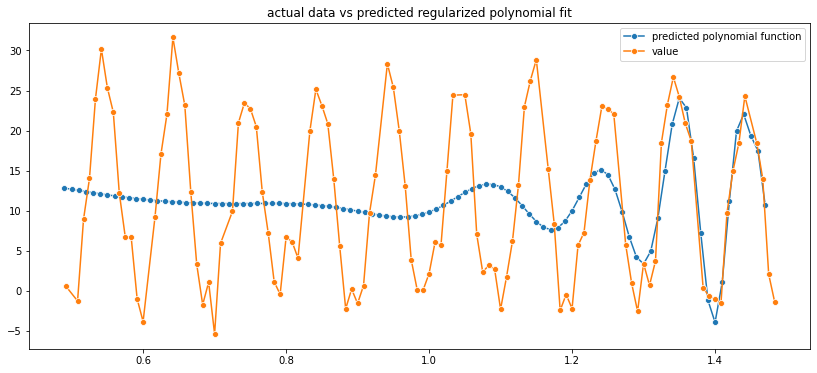

In [177]:
xp=[i/100 for i in range(49,148)]
#xp=[i/1000 for i in range(236,712)]
yp=[]
for x_coord in xp:
    phi=make_phi(80,x_coord)
    yp.append(np.sum(np.matmul(wml.transpose(),phi)))
plt.figure(figsize=(14,6))
sns.lineplot(xp,yp,marker='o',label='predicted polynomial function')
sns.lineplot(xfunc,value,marker='o',label='value')
#sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual data vs predicted regularized polynomial fit')
plt.show()

In [178]:
#Second approach sinusoidal??

In [179]:
print(xdata.shape,xvalid.shape)

(100,) (10,)


In [180]:
test

,id,date,month,year,xfunc
0,5/1/10,1,5,10,1.041667
1,4/1/09,1,4,9,0.933333
2,9/1/13,1,9,13,1.375000
3,1/1/06,1,1,6,0.608333
4,2/1/07,1,2,7,0.716667
5,8/1/12,1,8,12,1.266667
6,6/1/14,1,6,14,1.450000
7,3/1/08,1,3,8,0.825000
8,12/1/04,1,12,4,0.500000
9,7/1/11,1,7,11,1.158333


In [272]:
#import numpy as np
#xdata=np.genfromtxt('gaussian.csv',usecols=(0),delimiter=',')
#tdata=np.genfromtxt('gaussian.csv',usecols=(1),delimiter=',')

def square_error(m,t_i,w,x_i):
    phi=make_phi(m,x_i)
    w_t=w[:,None].transpose()
    wphi=np.matmul(w_t,phi[:,None])
    f=np.sum(wphi)
    diff=t_i-f
    return diff**2

def sum_square_error(m,n,t,w,x):
    total=0
    for i in range(n):
        total+=square_error(m,t[i],w,x[i])
    return total/2

def rms_error(sse,n):
    return (sse*2/n)**0.5

def make_phi(m,x_i):
    phi=np.zeros(m)
    for i in range(m):
        phi[i]=np.sin(np.pi*x_i)**i+2
        #phi[i]=np.sin(x_i)**(i)+1
    return phi

def des_mat(m,n,x):
    des= np.empty((0,m))
    
    for i in range(n):
        phi=make_phi(m,x[i])
        des=np.append(des,[phi],axis=0)
    return des

def reg_sum_square_error(lamb,m,n,t,w,x):
    sse=sum_square_error(m,n,t,w,x)
    w_t=w[:,None].transpose()
    rege=np.sum((lamb/2)*np.matmul(w_t,w[:,None]))
    return rege+sse


def least_square_regression_pinv(x,t,m,n):
    x=xdata[:n]
    t=tdata[:n]
    des=des_mat(m,n,x)
    moopeninv=np.linalg.pinv(des)
    wml=np.matmul(moopeninv,t)
    res=sum_square_error(m,n,t,wml,x)
    rmsres=rms_error(res,n)
    return wml,rmsres

def reg_least_square_regression_pinv(xdata,tdata,m,n,lamb):
    x=xdata[:n]
    t=tdata[:n]
    des=des_mat(m,n,x)
    #pinv
    '''
    pinv=np.matmul(des.transpose(),des)
    a=np.identity(m)
    a=a*lamb
    pinv=np.add(pinv,a)
    pinv=np.linalg.inv(pinv)
    pinv=np.matmul(pinv,des.transpose())
    '''
    pinv = np.matmul(np.linalg.pinv(lamb*np.identity(m)+np.matmul(np.transpose(des),des)),np.transpose(des))
    #print('reg',pinv)
    wmlreg=np.matmul(pinv,t)
    res=sum_square_error(m,n,t,wmlreg,x)
    resreg=reg_sum_square_error(lamb,m,n,t,wmlreg,x)
    rmsres=rms_error(res,n)
    rmsresreg=rms_error(resreg,n)
    return wmlreg,rmsresreg,rmsres


In [273]:
train_part=train[:100]
valid_part=train[100:]

In [274]:
xdata=train_part.xfunc.values
tdata=train_part.value.values
xvalid=valid_part.xfunc.values
tvalid=valid_part.value.values

In [275]:
errmin=1e43
for i in range(500):
    wml,rmsres=least_square_regression_pinv(xdata,tdata,i,100)
    err=sum_square_error(i,10,tvalid,wml,xvalid)
    testerr=rms_error(err,10)
    print(i,testerr,rmsres)
    if errmin>testerr:
        mmin=i
        errmin=testerr
print(mmin,errmin)

0 18.486708243113483 14.669039274383309
1 10.838234243452945 10.031069306497887
2 10.788069860233016 10.022489081376868
3 10.731715668039534 10.021808351588417
4 10.963122732172746 10.001182512119094
5 10.961340095128625 10.001164291620702
6 11.070854244997044 9.998613160115786
7 11.466171632982933 9.969012770842376
8 11.477913694701217 9.968797683094037
9 11.51799741233064 9.968451840503493
10 11.842455673278952 9.951958794949222
11 11.805414287258925 9.946448047497592
12 11.875401035927778 9.929827076298356
13 11.884978962151456 9.929809927482543
14 12.048612960772441 9.917885668317101
15 12.210672355995865 9.900403513401121
16 12.300882391704947 9.897593532241395
17 12.342094917272126 9.86675646972308
18 12.413422584218628 9.865663274615137
19 12.504996025660706 9.860969909962938
20 12.129041386880418 9.767670705363658
21 3.495317845290083 3.2602104457381498
22 2.57099412203027 2.6552909480093625
23 2.381754893634126 2.603839939324223
24 2.2523000061786767 2.5439586374750807
25 2.53

202 6.122245550516864 1.5609788298990832
203 4.77133008220683 1.5686740369986603
204 6.4805078331216 1.5676000537153212
205 5.10919234568599 1.5734430699632318
206 6.687287660893915 1.5734637217431047
207 5.006996279653933 1.5808447403570376
208 6.836284926216468 1.5808377657820887
209 5.09227981570112 1.5885652874811003
210 6.525901092007422 1.5877577988331795
211 5.035772495685559 1.5971432444411628
212 6.547709416443872 1.5967457612575933
213 5.148068271834085 1.6052939391247438
214 6.032705308060397 1.604547595313951
215 5.194045176872669 1.614031780119309
216 6.112367353218385 1.6139421998306702
217 63.20267402686326 1.51344678492533
218 65.89599577259989 1.5133785881735469
219 69.96203554639473 1.5150708229159688
220 71.85459216758522 1.514494947307806
221 75.75391862003536 1.5166605137805262
222 77.76244152996112 1.5164414517896725
223 81.46163642656646 1.519291112995902
224 84.37962331118148 1.5193898025399335
225 89.3536111759841 1.5233576263471342
226 91.61159785266057 1.5219

403 126330.21696226439 1.5034103911310206
404 131956.2514555822 1.502005640214763
405 135399.57422916693 1.5146104486414962
406 138394.81091502364 1.5026362939048363
407 141711.98004753867 1.5025571371616102
408 146665.3306706414 1.5107309678402387
409 151066.91118055425 1.5066180083705607
410 154814.9525084224 1.5044159319396482
411 159943.7544878826 1.5049326348115057
412 164979.92155329915 1.5036229682829476
413 168342.71154023605 1.5052021503194513
414 175989.43354161576 1.504379798495961
415 179228.05394263443 1.5068576542643164
416 184958.35323374116 1.5058617661555995
417 190830.3628930039 1.5040260919398385
418 195396.1442403924 1.5046767171799835
419 200637.3303549615 1.5059434996902819
420 207031.4668361978 1.5040280197744336
421 213047.40112916633 1.5056274442760218
422 219703.43720645885 1.5042353585890114
423 223106.4742282522 1.5044479846404815
424 231500.4063490758 1.504927821916359
425 237177.22988410768 1.5062423515089667
426 245153.01117971243 1.5073224139716406
427 2

In [276]:
print(mmin,errmin)

34 1.9173750907145795


In [277]:
#mmin=53

In [278]:
wml,rmsres=least_square_regression_pinv(xdata,tdata,mmin,100)

In [279]:
pred=get_output(mmin,10,xtest,wml)

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


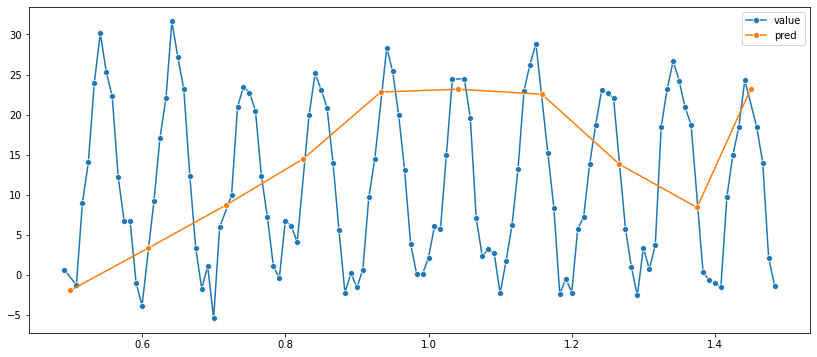

In [280]:
plt.figure(figsize=(14,6))
sns.lineplot(xfunc,value,marker='o',label='value')
sns.lineplot(xfunctest,pred,marker='o',label='pred')
plt.show()

/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rajarshidas/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


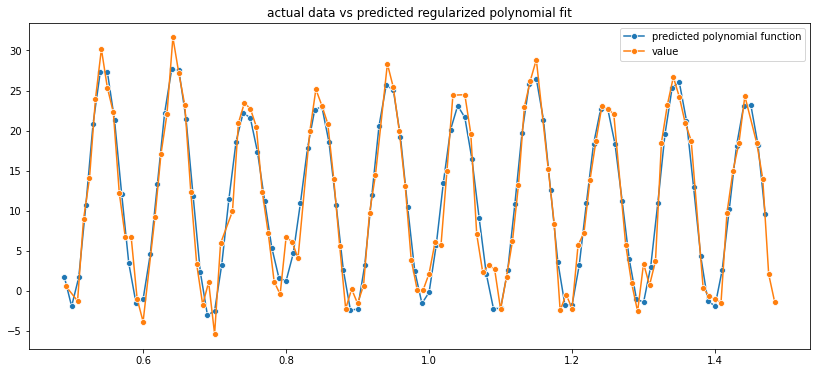

In [281]:
xp=[i/100 for i in range(49,148)]
yp=[]
for x_coord in xp:
    phi=make_phi(mmin,x_coord)
    yp.append(np.sum(np.matmul(wml.transpose(),phi)))
plt.figure(figsize=(14,6))
sns.lineplot(xp,yp,marker='o',label='predicted polynomial function')
sns.lineplot(xfunc,value,marker='o',label='value')
#sns.lineplot(xdata,tdata,marker='o',label='actual data')
plt.title('actual data vs predicted regularized polynomial fit')
plt.show()

In [495]:
# sin(i*x_i)             2.3461
# sin(x_i**i)            9
# sin(x_i)**i+1          2.84
# sin(x_i)**i+x_i        2.86
# sin(np.pi*x_i)**i      1.917697855475552 current best
# sin(np.pi*x_i)**i+1    1.9174673875893822
# sin(np.pi*x_i)**i+2    1.9173773875893822
# sin(np.pi*x_i)**i+i    1.918
# sin(np.pi*x_i)**i+x_i  1.9172379881187527 doesnt beat best

In [271]:
#best normalizer bcos sin function #failed
train_part=train[:100]
valid_part=train[100:]
erransmin=1e22
for j in range(1,500):
    xdata=train_part.xfunc.values/j
    tdata=train_part.value.values/j
    xvalid=valid_part.xfunc.values/j
    tvalid=valid_part.value.values/j
    
    errmin=1e43
    for i in range(500):
        wml,rmsres=least_square_regression_pinv(xdata,tdata,i,100)
        err=sum_square_error(i,10,tvalid,wml,xvalid)
        testerr=rms_error(err,10)
        #print(i,testerr,rmsres)
        if errmin>testerr:
            mmin=i
            errmin=testerr
    print(j,mmin,errmin)
    if errmin<erransmin:
        mini=j
        erransmin=errmin
print(mini,erransmin)

1 34 1.9182116108130416
2 71 2.1890860784339132
3 372 0.743200894134681
4 8 2.6603136369132736
5 47 2.02635370289807
6 499 1.6557684227520257
7 9 1.5239736516295865


KeyboardInterrupt: 

In [282]:
output=pd.DataFrame(test['id'])
output['value']=pred

In [283]:
output

,id,value
0,5/1/10,23.167236
1,4/1/09,22.812866
2,9/1/13,8.397354
3,1/1/06,3.312408
4,2/1/07,8.664352
5,8/1/12,13.785767
6,6/1/14,23.209610
7,3/1/08,14.464630
8,12/1/04,-1.943085
9,7/1/11,22.540955


In [284]:
output.to_csv('output.csv',index=False)